All required imports

In [1]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
#import keras
import os
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import imageio
%matplotlib inline

This loads data into pandas dataframes

In [2]:
try:
    root
except:
    root = os.getcwd()

data_path = os.path.join(root, "./skin-cancer-mnist-ham10000")
# the associated meta data
metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))
# the pixels RGB
X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))
np.shape(X_pixels)

(10015, 2353)

In [4]:
# image = plt.imread(os.path.join(data_path,"./HAM10000_images_part_1/ISIC_0024306.jpg"))/255.
# fig = plt.figure(figsize=(10,10))
# plt.imshow(image)

In [5]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [7]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


In [9]:
Y = metadata.loc[:, 'dx']
Y = pd.get_dummies(data=Y, columns=['dx'])
Y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [10]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Standardizing features
x = X_pixels.values
x = StandardScaler().fit_transform(x)

#Labels
y_ = Y.values*(np.arange(7)+1)
y = np.sum(y_,1)
labels = pd.DataFrame({'Label': y})

In [13]:
def plot_2d(x,y):
    # 2-component PCA plot
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)


    #ax.set_zlabel('Principal Component 3', fontsize = 15)
    leg = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']

    for k in range(np.size(leg)):
        #indices to plot
        b = y == k+1  
        ax.scatter(x[b,0],x[b,1], s = 50)
        ax.legend(leg)
        
def plot_3d(x,y):
    from mpl_toolkits.mplot3d import Axes3D
    #3-components PCA plot
    fig = plt.figure(figsize = (8,8))
    ax = Axes3D(fig)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)

    #ax.set_zlabel('Principal Component 3', fontsize = 15)
    leg = ['akiecc', 'bcc', 'bkl','df','mel','nv','vasc']

    for k in range(np.size(leg)):
        #indices to plot
        b = y == k+1  
        ax.scatter(x[b,0],x[b,1],x[b,2], s = 50)
        ax.legend(leg)


Explained variance ratio of components: [0.34918535 0.19008367 0.1250629 ]


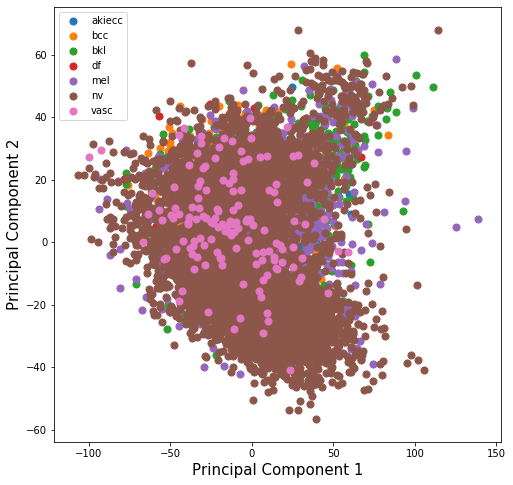

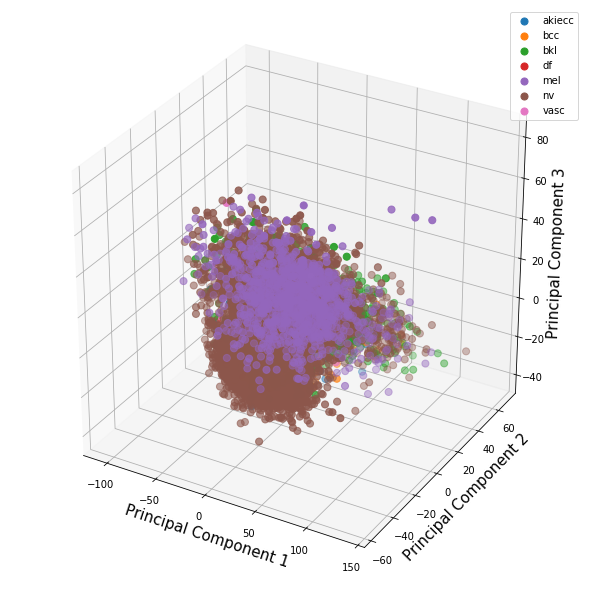

In [14]:
#PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
print('Explained variance ratio of components: %s'
      % str(pca.explained_variance_ratio_))

# plot results of PCA
plot_2d(principalComponents,y)

plot_3d(principalComponents,y)


Explained variance ratio of components: [0.31960131 0.20669402 0.15566026]


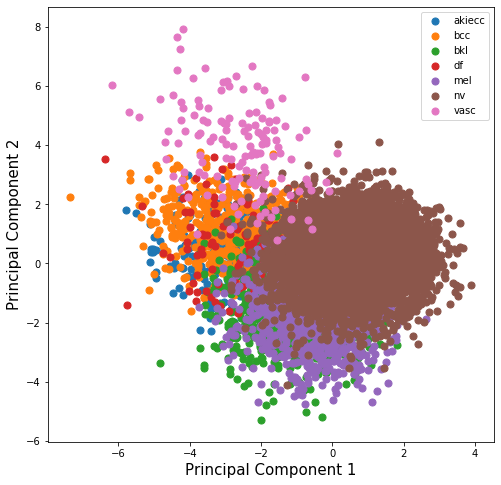

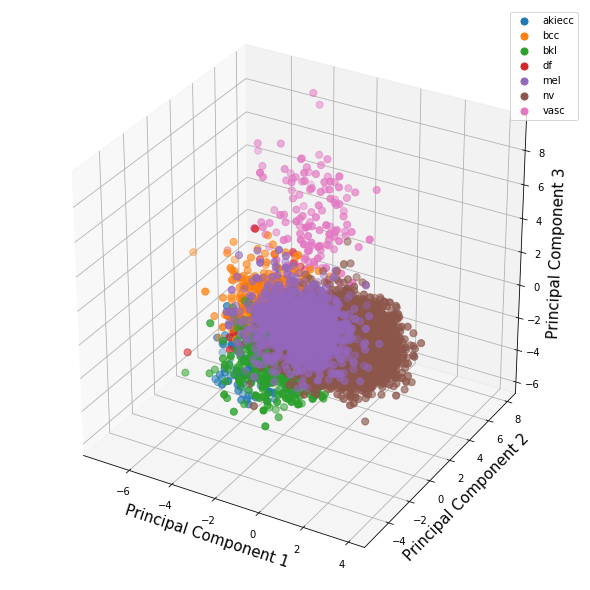

In [15]:
#LDA

lda = LDA(n_components=3)
lda.fit(x, y)
principalComponents = lda.fit_transform(x,y)

print('Explained variance ratio of components: %s'
      % str(lda.explained_variance_ratio_))

# plot results of PCA
plot_2d(principalComponents,y)

plot_3d(principalComponents,y)
